<a href="https://colab.research.google.com/github/SighanoCel/My-data-science-project/blob/main/projet_1_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

In [ ]:
R,z= make_regression(n_samples=100, n_features=3, noise=3, random_state=42)

# Calcul du décalage pour rendre toutes les valeurs de R positives
shift_R = np.abs(R.min()) + 0.1  # Décalage pour rendre R positif

# Appliquer le décalage à R pour obtenir des valeurs positives
R_positive = R + shift_R

# Limiter les valeurs de R et z en les multipliant par un facteur pour garder les nombres petits
R_positive_scaled = R_positive * 0.1
z_positive= z + np.abs(z.min()) + 0.1  # Déplacement pour garantir que z est positif
z_positive_scaled= z_positive*0.1  # Limiter l'échelle de z

# Affichage sous forme de DataFrame
df = pd.DataFrame(R_positive_scaled, columns=['utensili', 'macchine', 'personale'])
df['target'] = z_positive_scaled




In [ ]:
df

,utensili,macchine,personale,target
0,0.254875,0.384625,0.322653,18.538338
1,0.362226,0.313315,0.271857,15.240158
2,0.413230,0.474406,0.243188,27.744511
3,0.396693,0.227037,0.248411,9.284484
4,0.299855,0.317998,0.253899,13.775650
...,...,...,...,...
95,0.399266,0.410024,0.302600,23.640314
96,0.492728,0.547430,0.210345,35.951157
97,0.335150,0.380337,0.235976,18.947930
98,0.310668,0.292062,0.192590,10.939359


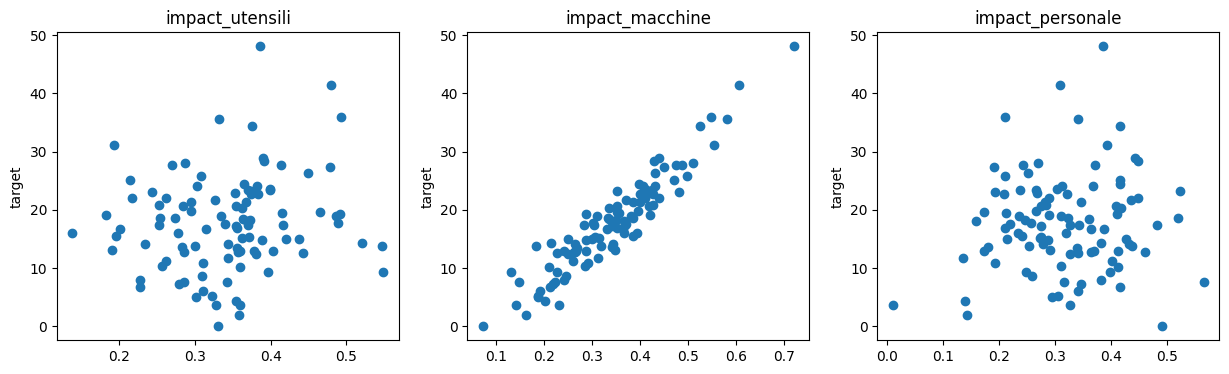

In [ ]:
fig, axes = plt.subplots(nrows= 1, ncols=3, figsize= (15,4), dpi=100)

axes[0].plot(df['utensili'], df['target'],'o')
axes[0].set_ylabel('target')
axes[0].set_title ('impact_utensili')

axes[1].plot(df['macchine'], df['target'],'o')
axes[1].set_ylabel('target')
axes[1].set_title ('impact_macchine')

axes[2].plot(df['personale'], df['target'],'o')
axes[2].set_ylabel('target')
axes[2].set_title ('impact_personale');


In [ ]:
X= df.drop('target', axis=1)

y= df['target']

In [ ]:
X

,utensili,macchine,personale
0,0.254875,0.384625,0.322653
1,0.362226,0.313315,0.271857
2,0.413230,0.474406,0.243188
3,0.396693,0.227037,0.248411
4,0.299855,0.317998,0.253899
...,...,...,...
95,0.399266,0.410024,0.302600
96,0.492728,0.547430,0.210345
97,0.335150,0.380337,0.235976
98,0.310668,0.292062,0.192590


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2, random_state=42 )

In [ ]:
y_train

,target
55,27.775327
88,6.806002
26,17.479149
42,28.050311
69,12.418114
...,...
60,34.364186
71,21.289675
14,17.758332
92,23.328046


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_predict = model.predict(X_test)

In [ ]:
linear_predict

array([17.46286793, 17.24980027, 10.98352131, 15.02580383, 22.29339426,
       48.47344505, 19.6214042 ,  9.29719656,  5.30851102, 18.57894596,
       23.25210553, 19.51527989, 12.37641327, 12.27430596, 19.58657575,
       13.62229076, 13.49120222, 12.74453893, 15.51263183, 23.10334716])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
MAE = mean_absolute_error(y_test, linear_predict)

MAE

0.2688298359773366

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, linear_predict))

RMSE



0.3338594426149758

In [ ]:
df['target'].mean()

17.73358149517966

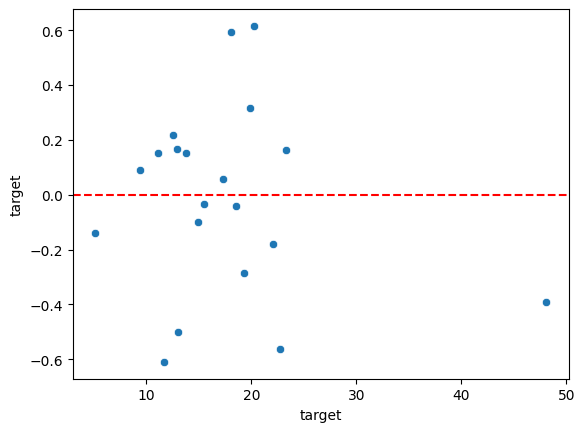

In [ ]:
sns.scatterplot(x=y_test, y=(y_test-linear_predict))

plt.axhline(y=0, color ='red', ls='--');

In [ ]:
model_to_save = LinearRegression()

In [ ]:
model_to_save.fit(X,y)

LinearRegression()

In [ ]:
model_to_save.coef_

array([28.23758641, 74.7404906 , 18.06026431])

In [ ]:
model_to_save_predict = model_to_save.predict(X)

Regression de Ridge

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import get_scorer_names

In [ ]:
ridge_model = RidgeCV(alphas=(0.01,0.5,1,10),scoring ='neg_mean_squared_error')

In [ ]:
ridge_model.fit(X_train,y_train)

RidgeCV(alphas=(0.01, 0.5, 1, 10), scoring='neg_mean_squared_error')

In [ ]:
ridge_model.alpha_

0.01

In [ ]:
ridge_predict= ridge_model.predict(X_test)

In [ ]:
ridge_MAE = mean_absolute_error(y_test,ridge_predict )

ridge_MAE

0.25428900485960765

In [ ]:
ridge_RMSE= np.sqrt(mean_squared_error(y_test, ridge_predict))

ridge_RMSE

0.33308641096240077

In [ ]:
ridge_model.coef_

array([27.63570259, 73.99577983, 17.60757732])

Regression de Lasso

In [ ]:
lasso_model = LassoCV(eps = 0.001, n_alphas=100, cv=5, max_iter=1000000)

In [ ]:
lasso_model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [ ]:
lasso_model.alpha_

0.0008512609411249457

In [ ]:
lasso_predict= lasso_model.predict(X_test)

In [ ]:
lasso_MAE = mean_absolute_error(y_test, lasso_predict)

MAE

0.2688298359773366

In [ ]:
lasso_RMSE= np.sqrt(mean_squared_error(y_test, lasso_predict))

lasso_RMSE

0.3322881149949471

In [ ]:
lasso_model.coef_

array([28.13832719, 74.76614585, 17.93402019])

ELASTIC NET

In [ ]:
elasticv_model= ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],eps=0.001, n_alphas =100, max_iter= 1000000)

In [ ]:
elasticv_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [ ]:
elasticv_predict = elasticv_model.predict(X_test)

In [ ]:
elasticv_model.alpha_

0.0008512609411249457

In [ ]:
elasticv_model.coef_

array([28.13832719, 74.76614585, 17.93402019])

In [ ]:
elasticv_MAE = mean_absolute_error(y_test, elasticv_predict)

elasticv_MAE

0.26916378830211374

In [ ]:
elasticv_RMSE = np.sqrt(mean_squared_error(y_test, elasticv_predict))

elasticv_RMSE

0.3322881149949471

In [ ]:
elasticv_complete_model= ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],eps=0.001, n_alphas =100, max_iter= 1000000)

In [ ]:
elasticv_complete_model.fit(X,y)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [ ]:
elasticv_complete_predict = elasticv_complete_model.predict(X)



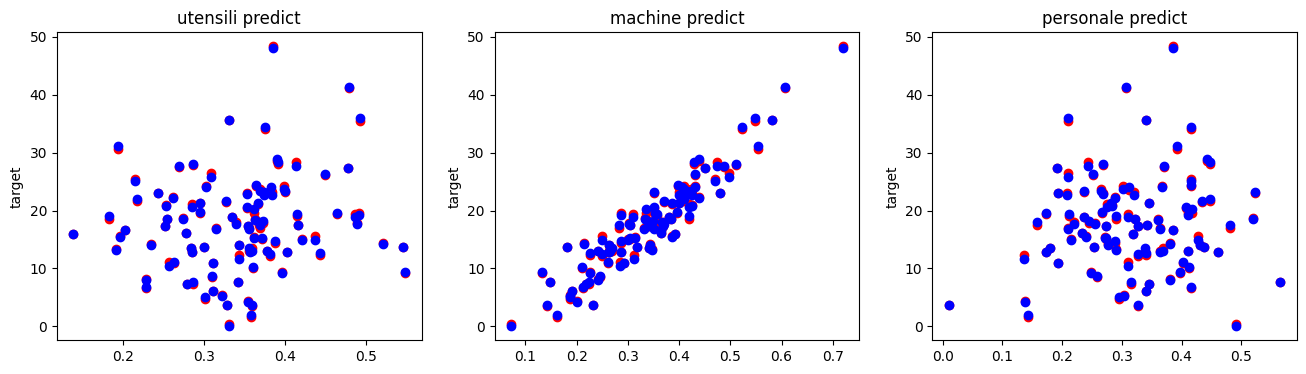

In [ ]:
fig, axe = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

axe[0].plot(df['utensili'],elasticv_complete_predict,'o',color='red')
axe[0].plot(df['utensili'],df['target'],'o', color= 'blue' )
axe[0].set_title('utensili predict')
axe[0].set_ylabel('target')

axe[1].plot(df['macchine'],elasticv_complete_predict,'o',color='red')
axe[1].plot(df['macchine'],df['target'],'o', color= 'blue' )
axe[1].set_title('machine predict')
axe[1].set_ylabel('target')

axe[2].plot(df['personale'],elasticv_complete_predict,'o',color='red')
axe[2].plot(df['personale'],df['target'], 'o',color= 'blue' )
axe[2].set_title('personale predict')
axe[2].set_ylabel('target');

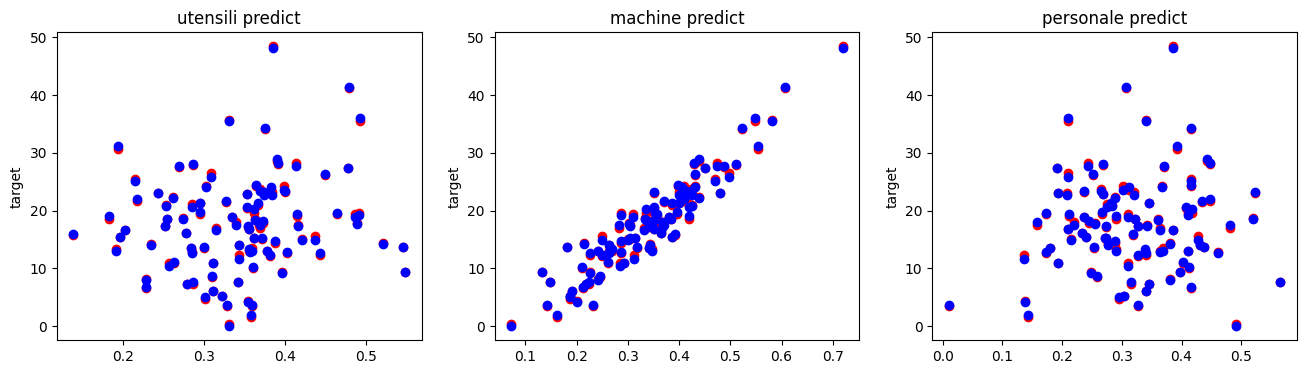

In [ ]:
fig, axe = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

axe[0].plot(df['utensili'],model_to_save_predict,'o',color='red')
axe[0].plot(df['utensili'],df['target'],'o', color= 'blue' )
axe[0].set_title('utensili predict')
axe[0].set_ylabel('target')

axe[1].plot(df['macchine'],model_to_save_predict,'o',color='red')
axe[1].plot(df['macchine'],df['target'],'o', color= 'blue' )
axe[1].set_title('machine predict')
axe[1].set_ylabel('target')

axe[2].plot(df['personale'],model_to_save_predict,'o',color='red')
axe[2].plot(df['personale'],df['target'], 'o',color= 'blue' )
axe[2].set_title('personale predict')
axe[2].set_ylabel('target');

In [ ]:
model_to_save.coef_

array([28.23758641, 74.7404906 , 18.06026431])